In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import math

# **PHYS 481 - Assignment 4**
## **Josh Houghton**

---
---


## **Introduction**

In this assignment, I explored several topics in relation to random walks. Specifically, I used Python to explore and analyze the one-dimensional random walk, as well as it's relation and applicability to the theory of Markov Chains.

## **Problem 3.1.1 - Simulating Random Walks**

### **Methodology**

For this problem, I was tasked with creating a program to follow the path of a random walker in one-dimension for $N$ steps. Repeating this process many times allowed me to create a probability distribution of where the random walker would end up after these $N$ steps. After doing so, I was also tasked with calculating the width of the distribution as a function of $N$.

I was able to succesfully complete these two tasks, the code for which is split into three separate cells below.

To create the probability distribution for the random walker. I began by initializing a one-dimensional array to be filled with zeros, except for the center cell of the array, which was assigned a value of one. This one value would serve to represent the random walker. After the lattice (array) was initialized, I iterated through a loop $N$ times, with each iteration taking a random number from NumPy, and using it to decide which direction the walker would step. Specifically, if the random number was a one, the walker would step right, and if it was a two, the walker would step left. Clearly, the probabilities of going left or right were both equally 0.5. For each move, using array indexing, I moved the one value in the array accordingly. The above procedure allowed me to succesfully simulate a random walk in one dimension, and the result would be an array with a walker at some position. To carry this further and create the probability distribution, I simply had to repeat this process many times.

Using another loop, I computed the results of 20000 random walks. For each walk, the final position of the walker was added to a master array used for the purpose of plotting. By the end of this process, I was left with an array filled with a multitude of values, which represented the number of times that thte random walker ended up on each specific cell. To convert this into a probability distribution, all that needed to be done was to divide all values of the array by the total number of walks that were used. After doing so, I created a plot of the data. I also created a curve on top of the plot to demonstrate the theoretical Gaussian distribution, which will be discussed more in the results section for this problem.

To compute the widths of all of these distributions, I opted to use the exact same loop as above, although I did remove much of the uneccesary tracking and plotting code. Instead, I included two lines that would calculate the standard deviation of each plot. To do so, I simply used the standard definitions of the mean, variance, and standard deviation from statistical theory. After the program had finished computing the probability distribution, I used NumPy's array arithmetic to first compute the mean value as the sum of all of the products of each individual probability and it's corresponding value (final location of the walker). After doing so I computed the variance as the sum of all of the products of again, the individual probabilities, this time with the square of the difference between the corresponding value and the mean value. Obviously, from the variance, I could simply take the square root to find the standard deviation or width. I did this within a function, so that I could call the function for many different values of $N$, and it would simply return the width.

Finally, to perform some analysis, I proceeded to call this function many times in a loop, for many different values of $N$. In doing so, I kept track of the width values, so they could be plotted afterwards. I also opted to produce a log-log plot of this data, for reasons I will explain in the section following my code for this problem.



### **Code**

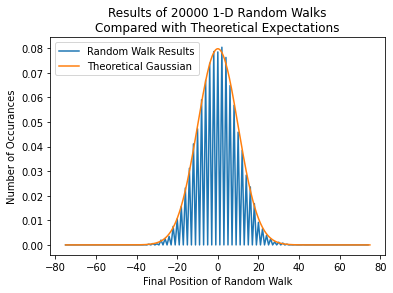

In [ ]:
# Sets the number of steps each walk will take, number of walks, and the size of the grid
N = 100
nwalks = 20000
grid_wid = int(1.5*N)

results = np.zeros((1,grid_wid)) # array to keep track of the number of occurances of each walks final position

# loop that iterates over many random walks, each time beginiing the walk at the middle of the grid
for walks in range(nwalks):
  domain = np.zeros((1,grid_wid))
  pos = grid_wid//2
  # loop that iterates over N steps
  for i in range(N):
    # determines which direction the random walk will progress using NumPy random
    move = random.randint(1,3)
    if move == 2:
      move = -1
    #updates the position of the walker according to the randomly determined move
    domain[0][pos] = 0
    pos += move
    domain[0][pos] = 1

  results += domain # appends this iteration's final position of walker to list for tracking

results = results[0] / nwalks
probs = np.arange((-grid_wid)//2,grid_wid//2,1) # axis for plotting the results of random walks

# creating the theoretical gaussian distribution using
# findings for the mean and variance of the theoretical
# probability distribution for many random walkers
P = 1/2
Q = 1/2
sigma = 2*math.sqrt(N*P*Q)
mu = N*(P-Q)

x_gauss = np.arange((-grid_wid)//2,grid_wid//2,0.1)
y_gauss = []
for x in x_gauss:
  y = (2*nwalks*(1/(sigma*math.sqrt(2*math.pi)))*math.exp((-1/2)*((x-mu)/sigma)**2)) / nwalks
  y_gauss += [y]

# plotting instructions
plt.plot(probs, results, markersize=1, label="Random Walk Results")
plt.plot(x_gauss, y_gauss, label="Theoretical Gaussian")
plt.title("Results of "+str(nwalks)+" 1-D Random Walks\nCompared with Theoretical Expectations")
plt.xlabel("Final Position of Random Walk")
plt.ylabel("Number of Occurances")
plt.legend(loc=2)
plt.show()

In [ ]:
# function to compute the width of the distribution for a given random walk

def find_width(N, nwalks):
  grid_wid = int(3.5*N)

  results = np.zeros((1,grid_wid)) # array to keep track of the number of occurances of each walks final position

  # loop that iterates over many random walks, each time beginiing the walk at the middle of the grid
  for walks in range(nwalks):
    domain = np.zeros((1,grid_wid))
    pos = grid_wid//2
    # loop that iterates over N steps
    for i in range(N):
      # determines which direction the random walk will progress using NumPy random
      move = random.randint(1,3)
      if move == 2:
        move = -1
      #updates the position of the walker according to the randomly determined move
      domain[0][pos] = 0
      pos += move
      domain[0][pos] = 1

    results += domain # appends this iteration's final position of walker to list for tracking

  probs = results[0] / nwalks
  x = np.arange((-grid_wid)//2,grid_wid//2,1) # axis for plotting the results of random walks

  mean = sum(probs*x)
  width = math.sqrt(sum(probs * (x - mean)**2))
  
  return width

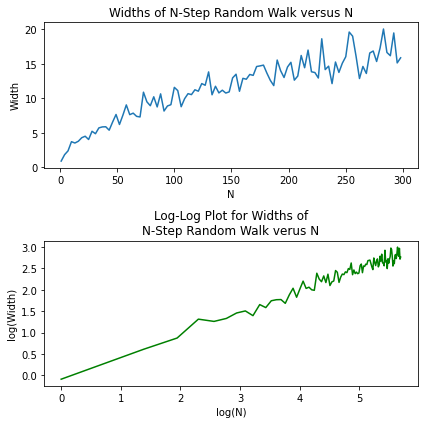

In [ ]:
nwalks = 5000   # NOTE: 5000 is a good value to produce great results but takes ~5 minutes, if needed, bump it down lower and that should still suffice
N_list = np.arange(1,301,3)
width_list = []

# loop that iterates through N values and computes the width 
# of each walk. Then adds this width to a list for plotting
for N in N_list:
  width = find_width(int(N), nwalks)
  width_list += [width]

# computing logs of N and the corresponding widths
log_N = np.log(N_list)
log_width = np.log(width_list)

# plotting instructions
fig, ax = plt.subplots(2,1, figsize = (6,12))

ax[0].plot(N_list, width_list)
ax[0].set_title("Widths of N-Step Random Walk versus N")
ax[0].set_xlabel("N")
ax[0].set_ylabel("Width")

ax[1].plot(log_N, log_width, color = "green")
ax[1].set_title("Log-Log Plot for Widths of\nN-Step Random Walk verus N")
ax[1].set_xlabel("log(N)")
ax[1].set_ylabel("log(Width)")

plt.tight_layout()

### **Results & Discussion**

In observing the plot produced by the first of the three above cells, one can quite clearly see that it lines up nearly perfectly with the theoretical Gaussian curve plotted on the same figure. It is important to note, that within the code, although the theoretical standard deviation *should* be computed as $\sigma=\sqrt{NPQ}$, I instead have it calculated as double this. The reason for this is due to the nature of a random walk in one dimension where the walker never reaches the edge of the lattice. Since I opted for the walker to take an even number of steps, it is trivial that it is not possible for the walker to ever land on an odd cell. For this reason, every other cell in the distribution technically has a probability of zero. Theoretically, this is not accounted for, so the standard deviation needs to be doubled, due to the fact that if this was instead a continuous distribution or one in which the walker *could* end up on those odd cells, the distribution size would be doubled.Otherwise, all results for this first task line up exactly with what is expected in theory.

Upon graphing the widths of the distributions as a function of $N$, I noticed a trend in the line which looked similar to something I have seen in the past. For this reason, I decided to also produce a log-log plot. As demonstrated in my data, my suspicion was confirmed by the fact that the log-log plot produced a very linear trendline. Specifically, one can see that this plot increases with a slope of $0.5$. From this, as I've done in previous assignments, I deduced that there is a direct proportionality relation between the standard deviation of the distribution, and $N^{1/2}$, i.e $\sigma \propto \sqrt{N}$. This is exactly expected, given that as mentioned previously, the theoretical expression for the standard deviation is given by $\sigma=\sqrt{NPQ}$. Clearly, from this, it clear that all of the results I was able to obtain for this problem lined up perfectly with what is expected in theory.

## **Problem 3.2.1 - Random Walk as a Markov Chain**

### **Methodology**

For this assignment problem, my tasks were broken down in to four separate sections. 

First, I had to use the transition matrix approach to create a Python program to find the probability distribution for a one-dimensional random walk with periodic boundary conditions. To do so, I first had to create the transition matrix. I did this using the assignment specifications, and extending the method to an $N\times N$ array. Using a loop, I shifted the location of the two 0.5 probability values to the right (using NumPy roll), as was shown in the specifications. Once I had obtained the transition matrix, I created a lattice similar to that for the previous problem, to represent the lattice itself. Once this was done, all that was left to do was to perform the actual matrix transformations to obtain the probability distribution. To do so, I used NumPy's linear algebra module to first raise the transition matrix to a very high power (I opted for 100000). After doing so, I simply mulitiplied the results of this matrix power by my lattice array to obtain the probability distribution. I did this for three different combinations of $N$ and number of step values, plottting each one to display the results.

For the second part of my tasks, I had to computationally determine whether or not each Markov Chain had a steady state limit, for odd values of $N$ from 3 to 20. To do so, I first definied a function that would effectively compute the number of steps taken to reach a steady state for a given Markov Chain (if one existed). Within this function, I created the same transition matrix to that done previously, depending on the value of $N$ used as an arguement in the function. Next I created a while loop that would iterate until a certain threshould of steps was reached. Within each iteration, I used NumPy's linear algebra library to compute two different matrices. One of these was the transition matrix raised to the power of the current nsteps value, whereas the second one was the transition matrix raised to the power of the current nsteps value *plus one*. By doing this, I was then able to make a comparision between the two matrices of preceeding steps. Using a condition, my program would then deduce that if the two matrices were the same, a steady state had been reached after the current number of steps. If this was indeed true, the program would output the number of steps that it took to reach this steady state. If a steady state was never reached, the program was coded to just return a None value. To test the steady state limit for the $N$ values of interest, I simply created a loop that iterated through $N$ values, each time calling the function to compute the steady state limit. These results were then printed in each iteration. I also kept track of the results in a list, and made a simple plot of the data for analysis.

For the third part of this assignment problem, I was tasked with computing the probability distribution in another manner. Specifically, I had to use the diagonalzed eigenvalue matrix in order to do so. First, my program diagonalizes the matrix, once again using NumPy's linear algebra library. After doing so, it performs the necessary unitary transformation in order to obtain the steady-state distribution. I created two seperate code cells for this part of the problem. The first one simply prints all of the computed eigenvalues for each $N$ value, which is done for comparison that will be discussed in the results section. The second cell takes the resulting probability distribution that is obtained using the diagonalization method, and creates a plot. This was done for the same small $N$ values as mentioned previously, so that my result was 9 different plots.

For the fourth and final part of this assignment problem, I was tasked with obtaining the eigenvalues and eigenvectors analytically instead. This was done so that they could be compared with the data that was gained as a result of the previous part of the problem. To do this, I applied the method of using the boundary conditions of the Markov Chain to create an expression for the action of the transition matrix on the probabilities. In doing so, I was able to mathematically determine an expression for the eigenvalues of each random walk. Specifically, I was able to deduce that

$$\lambda_k = \cos{\left(\frac{\pi k}{N-1}\right)} \hspace{35pt} k = 0,1,2, ..., N-1$$

Upon testing, I found that using this expression in my code worked properly which will be discussed more in the results section for this problem. With this in mind, I was able to simply create a loop through the $N$ values of interest, each time analytically solving for all eigenvalues. Then, by simple linear algebra definitions, I added code to expand these to their corresponding eigenvectors. To analyze how the time it takes to reach a steady state relates to $N$ I opted to make some more analytic computations and observations. From the equation relating the transition matrices actions on the probabilities to the boundary conditions of each Markov Chain, I was able to deduce that the rate at which the Markov chain converges to a steady state *should be* in direct correlation with the differences between the magnitudes of each eigenvalue. Also, mathematically from the boundary conditions equation, I deduced that this relation should be able to be approximated by 

$$\frac{\pi^2}{2 N^2}$$

Therefore, in order to test whether or not my theory was true, I added code to compute this value, as well as the difference between the first two eigenvalue magnitudes. If these two values were indeed the same of approximately the same, I could then deduce that the above expression is a valid relation to express how the time taken to reach a steady state varies with $N$. Specifically, upon undergoing some more rigourous mathematics I came to the conclusion that if my above hypothesis was proved correct by my code, then the following would be true:

$$\frac{1}{\tau} \propto \frac{\pi^2}{2 N^2}$$
$$ $$
$$⇒ \tau \propto N^2$$

All of the interesting results for this part of the problem are then simply printed below the code cell, which I analyze in the following discussion section.

### **Code**

---
**Part (a)**

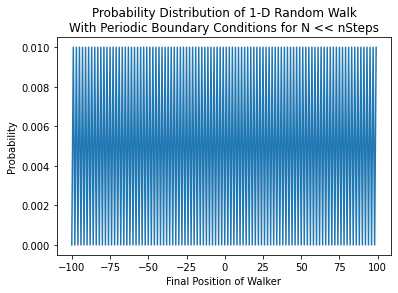

In [ ]:
# to properly simulate a walk with periodic boundary conditions 
# ensure that nsteps is larger than N
N = 200
nsteps = 100000
T = np.zeros((N,N))

# creating first row of transition matrix
T_i = np.zeros((1,N))
T_i[0][1], T_i[0][-1] = 0.5, 0.5

# creating the rest of the transition matrix
for i in range(N):
  T[i] = T_i
  T_i = np.roll(T_i,1,axis=1)

# initial conditions
lattice = np.zeros((1,N))
lattice = lattice[0]
lattice[N//2-1] = 0.5
lattice[N//2+1] = 0.5

# performing matrix computations to get probability distribution
T_n = np.linalg.matrix_power(T,nsteps)
probs = np.matmul(T_n,lattice)

x_axis = np.arange(-N//2,N//2,1)

plt.plot(x_axis,probs)
plt.title("Probability Distribution of 1-D Random Walk\nWith Periodic Boundary Conditions for N << nSteps")
plt.xlabel("Final Position of Walker")
plt.ylabel("Probability")
plt.show()

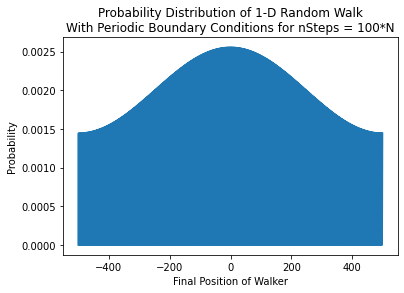

In [ ]:
# to properly simulate a walk with periodic boundary conditions 
# ensure that nsteps is larger than N
N = 1000
nsteps = 100000
T = np.zeros((N,N))

# creating first row of transition matrix
T_i = np.zeros((1,N))
T_i[0][1], T_i[0][-1] = 0.5, 0.5

# creating the rest of the transition matrix
for i in range(N):
  T[i] = T_i
  T_i = np.roll(T_i,1,axis=1)

# initial conditions
lattice = np.zeros((1,N))
lattice = lattice[0]
lattice[N//2-1] = 0.5
lattice[N//2+1] = 0.5

# performing matrix computations to get probability distribution
T_n = np.linalg.matrix_power(T,nsteps)
probs = np.matmul(T_n,lattice)

x_axis = np.arange((-N)//2,N//2,1)

plt.plot(x_axis,probs)
plt.title("Probability Distribution of 1-D Random Walk\nWith Periodic Boundary Conditions for nSteps = 100*N")
plt.xlabel("Final Position of Walker")
plt.ylabel("Probability")
plt.show()

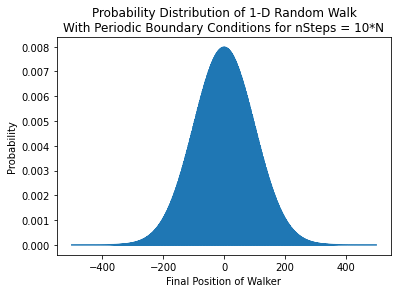

In [ ]:
# to properly simulate a walk with periodic boundary conditions 
# ensure that nsteps is larger than N
N = 1000
nsteps = 10000
T = np.zeros((N,N))

# creating first row of transition matrix
T_i = np.zeros((1,N))
T_i[0][1], T_i[0][-1] = 0.5, 0.5

# creating the rest of the transition matrix
for i in range(N):
  T[i] = T_i
  T_i = np.roll(T_i,1,axis=1)

# initial conditions
lattice = np.zeros((1,N))
lattice = lattice[0]
lattice[N//2-1] = 0.5
lattice[N//2+1] = 0.5

# performing matrix computations to get probability distribution
T_n = np.linalg.matrix_power(T,nsteps)
probs = np.matmul(T_n,lattice)

x_axis = np.arange((-N)//2,N//2,1)

plt.plot(x_axis,probs)
plt.title("Probability Distribution of 1-D Random Walk\nWith Periodic Boundary Conditions for nSteps = 10*N")
plt.xlabel("Final Position of Walker")
plt.ylabel("Probability")
plt.show()

---
**Part (b)**

In [ ]:
# this function checks different powers of the transition matrix for a given N
# until a steady state is reached (matrices repeat). Outputs the number of steps
# taken to get to the steady state, or None if a steady state is not reached
def find_steady(N, nmax):
  T = np.zeros((N,N))

  T_i = np.zeros((1,N))
  T_i[0][1], T_i[0][-1] = 0.5, 0.5

  for i in range(N):
    T[i] = T_i
    T_i = np.roll(T_i,1,axis=1)

  # creating same lattice as done previously
  lattice = np.zeros((1,N))
  lattice = lattice[0]
  lattice[N//2-1] = 0.5
  lattice[N//2+1] = 0.5

  nsteps = 1
  while nsteps < nmax:
    nsteps += 1
    # creating two matrices one for the previous step and one for the current step
    # to be compared to determine if a steady state has been reached
    test_T1 = np.matmul(np.linalg.matrix_power(T,nsteps), lattice)
    test_T2 = np.matmul(np.linalg.matrix_power(T,nsteps+1), lattice)

    if np.array_equal(test_T1,test_T2) == True:
      
      return nsteps+1

Steady state for N = 3 reached after 56 steps.

Steady state for N = 5 reached after 182 steps.

Steady state for N = 7 reached after 357 steps.

Steady state for N = 9 reached after 627 steps.

Steady state for N = 11 reached after 1036 steps.

Steady state for N = 13 reached after 1315 steps.

Steady state for N = 15 reached after 2223 steps.

Steady state for N = 17 reached after 6453 steps.

Steady state for N = 19 reached after 15920 steps.



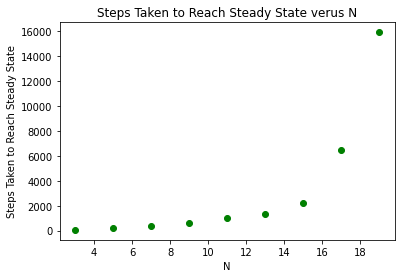

In [ ]:
# Using find_steady function to find the number of steps taken to 
# reach steady state for small N (odd) with limit of 50000 steps

N_list = np.arange(3,20,2)
steps_list = []

# calculating steady state (if one exists) and prints number of steps taken to reach it
for N in N_list:
  steps = find_steady(N,50000)
  if steps != None:
    print("Steady state for N = "+str(N)+" reached after "+str(steps)+" steps.")
    print("")
  else:
    print("Steady state for N = "+str(N)+" was not reached after 50000 steps.")
    print("")
  steps_list += [steps]

# plotting instructions
plt.plot(N_list,steps_list,"go")
plt.xlabel("N")
plt.ylabel("Steps Taken to Reach Steady State")
plt.title("Steps Taken to Reach Steady State verus N")
plt.show()

In [ ]:
# same as above cell, but this time for small even N 

N_list = np.arange(4,20,2)
steps_list = []

for N in N_list:
  steps = find_steady(N,10000)
  if steps != None:
    print("Steady state for N = "+str(N)+" reached after "+str(steps)+" steps.")
    print("")
  else:
    print("Steady state for N = "+str(N)+" was not found.")
    print("")
  steps_list += [steps]

Steady state for N = 4 was not found.

Steady state for N = 6 was not found.

Steady state for N = 8 was not found.

Steady state for N = 10 was not found.

Steady state for N = 12 was not found.

Steady state for N = 14 was not found.

Steady state for N = 16 was not found.

Steady state for N = 18 was not found.






---


**Part (c)**

In [ ]:
# this cell is used for printing the eigenvalues

from numpy import linalg as LA

N_list = np.arange(3,20,2)

# for loop that iterates through the N values of interest
for j, N in enumerate(N_list):

  # creates transition matrix
  T = np.zeros((N,N))
  T_i = np.zeros((1,N))
  T_i[0][1], T_i[0][-1] = 0.5, 0.5

  for i in range(N):
    T[i] = T_i
    T_i = np.roll(T_i,1,axis=1)

  # applies transformation to obtain the necessary diagonal matrix of eigenvalues
  # as well as other matrices of interest
  evals, evecs = LA.eig(T)
  print("N = "+str(N))
  print("Eigenvalues:")
  print(evals)
  print("")

N = 3
Eigenvalues:
[-0.5  1.  -0.5]

N = 5
Eigenvalues:
[-0.80901699  0.30901699  1.         -0.80901699  0.30901699]

N = 7
Eigenvalues:
[-0.90096887 -0.22252093  1.          0.6234898  -0.90096887 -0.22252093
  0.6234898 ]

N = 9
Eigenvalues:
[-0.93969262 -0.5         0.17364818  1.          0.76604444 -0.93969262
  0.76604444  0.17364818 -0.5       ]

N = 11
Eigenvalues:
[-0.95949297 -0.65486073 -0.14231484  0.41541501  1.          0.84125353
  0.84125353 -0.95949297 -0.65486073 -0.14231484  0.41541501]

N = 13
Eigenvalues:
[-0.97094182 -0.74851075 -0.35460489  0.12053668  0.56806475  1.
  0.88545603 -0.97094182 -0.74851075  0.88545603 -0.35460489  0.12053668
  0.56806475]

N = 15
Eigenvalues:
[-0.9781476  -0.80901699 -0.5        -0.10452846  0.30901699  0.66913061
  1.          0.91354546 -0.9781476  -0.80901699  0.91354546  0.66913061
 -0.10452846  0.30901699 -0.5       ]

N = 17
Eigenvalues:
[-0.9829731  -0.85021714 -0.60263464 -0.27366299  0.09226836  0.44573836
  1.          0.

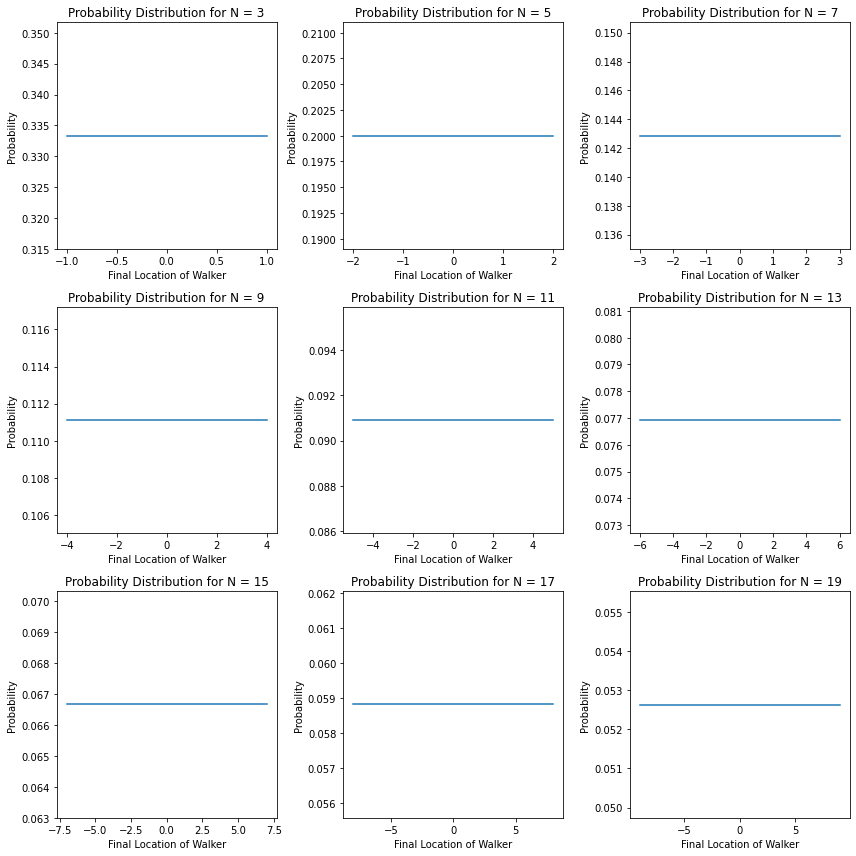

In [ ]:
# this cell is used for plotting the probability distributions

from numpy import linalg as LA

N_list = np.arange(3,20,2)
fig, ax = plt.subplots(3,3, figsize=(12,12))
ax = ax.flatten()

# for loop that iterates through the N values of interest
for j, N in enumerate(N_list):

  # creates transition matrix
  T = np.zeros((N,N))
  T_i = np.zeros((1,N))
  T_i[0][1], T_i[0][-1] = 0.5, 0.5

  for i in range(N):
    T[i] = T_i
    T_i = np.roll(T_i,1,axis=1)

  # applies transformation to obtain the necessary diagonal matrix of eigenvalues
  # as well as other matrices of interest
  evals, evecs = LA.eig(T)
  inverse_evecs = LA.inv(evecs)
  diag_T = inverse_evecs.dot(T).dot(evecs)
  diag_T = diag_T.round(5)
  # taking limit of high m
  inf_diag_T = LA.matrix_power(T, 100000)

  # plotting in subplot
  probs = inf_diag_T[0]
  x_axis = np.arange(-N//2+1,N//2+1,1)
  ax[j].plot(x_axis, probs)
  ax[j].set_title("Probability Distribution for N = "+str(N))
  ax[j].set_xlabel("Final Location of Walker")
  ax[j].set_ylabel("Probability")
  plt.tight_layout()





---


**Part (d)**

In [ ]:
# analytically determining eigenvalues and eigenvectors for comparison

N_list = np.arange(3,20,2)

# for loop that iterates through N values of interest
for N in N_list:
  # makes a list of k values so we can vary k to find all eigenvalues
  k_list = np.arange(0,N,1)
  eigvals = []
  # calculating eigenvalues for all k according to boundary conditions and equation
  for k in k_list:
    eigval = math.cos(math.pi*k*(1/N-1))
    eigvals += [eigval]

  # finding eigenvectors from eigenvalues
  eigvec_list = []
  for j, val in enumerate(eigvals):
    eigvec = np.zeros((1,N))
    eigvec = list(eigvec[0])
    eigvec[j] = val
    eigvec_list += [eigvec]

  # printing instructions as well as testing 
  print("N = "+str(N))
  print("Eigenvalues:", eigvals)
  print("Eigenvectors:")

  for i in range(len(eigvec_list)):
    print('\t',eigvec_list[i])
  
  testval1 = 1-abs(eigvals[1])
  testval2 = (1/2)*math.pi**2/(N)**2
  print("The difference between the two eigenvalues with largest magnitude is:",testval1)
  print("The value of 0.5*pi^2 / N^2 is:",testval2)
  print("")
  print("The difference between these values is just "+str(abs(round(testval1-testval2,7)))+". Therefore, our assumption\nholds true and the time taken to reach a steady state increases proportional to N^2.")
  print("")

N = 3
Eigenvalues: [1.0, -0.5000000000000002, -0.4999999999999996]
Eigenvectors:
	 [1.0, 0.0, 0.0]
	 [0.0, -0.5000000000000002, 0.0]
	 [0.0, 0.0, -0.4999999999999996]
The difference between the two eigenvalues with largest magnitude is: 0.4999999999999998
The value of 0.5*pi^2 / N^2 is: 0.5483113556160755

The difference between these values is just 0.0483114. Therefore, our assumption
holds true and the time taken to reach a steady state increases proportional to N^2.

N = 5
Eigenvalues: [1.0, -0.8090169943749473, 0.30901699437494723, 0.30901699437494773, -0.8090169943749477]
Eigenvectors:
	 [1.0, 0.0, 0.0, 0.0, 0.0]
	 [0.0, -0.8090169943749473, 0.0, 0.0, 0.0]
	 [0.0, 0.0, 0.30901699437494723, 0.0, 0.0]
	 [0.0, 0.0, 0.0, 0.30901699437494773, 0.0]
	 [0.0, 0.0, 0.0, 0.0, -0.8090169943749477]
The difference between the two eigenvalues with largest magnitude is: 0.19098300562505266
The value of 0.5*pi^2 / N^2 is: 0.19739208802178715

The difference between these values is just 0.0064091. 

0.993898024522886 -1.3295107306644436 4.482498528853728


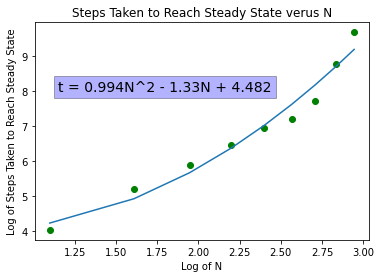

In [ ]:
# Using find_steady function to find the power of the relationship between
# the time taken to reach a steady state and N, as the slope of the log-log plot

N_list = np.arange(3,20,2)
steps_list = []

# calculating steady state (if one exists) and prints number of steps taken to reach it
for N in N_list:
  steps = find_steady(N,16000)
  steps_list += [steps]

log_N = np.log(N_list)
log_steps = np.log(steps_list)
a, b, c = np.polyfit(log_N, log_steps, 2)
print(a,b,c)

# plotting instructions
plt.plot(log_N, log_steps,"go")
plt.plot(log_N, a*(log_N)**2+b*log_N+c)
plt.text(1.15,8,"t = "+str(round(a,3))+"N^2 - "+str(round(abs(b),3))+"N + "+str(round(c,3)), fontsize=14, bbox=dict(facecolor='blue',alpha=0.3))
plt.xlabel("Log of N")
plt.ylabel("Log of Steps Taken to Reach Steady State")
plt.title("Steps Taken to Reach Steady State verus N")
plt.show()

### **Results & Discussion**

For the first part of this problem, I was able to produce three different probabiliity distributions. The first of which is that for a random walk where the number of steps taken is much larger than the number of possible states for the Markov Chain. For this case, we observe a near perfectly uniform probability distribution. Given that the number of steps taken, it is safe to say that the steady state of the Markov chain has been reached in this case, and these results are exactly as expected. For the next case, we see less uniformity, and a Gaussian shape begins to emerge. For the final case, the probability distribution is essentially a perfect Gaussian distribution. These results correlate to the fact that by varying the ratio between $N$ and the number of steps taken, we have not allowed enough time to reach a steady state. A simple intuitive way to think about this, is that if the number of steps taken is much larger than the width of the lattice (which has periodic boundary conditions) then the walker has a much higher chance to reach the boundary. Interestingly, this does indeed line up with the theoertical expecation that the probability distribution should be uniform in this case. With this in mind, the results obtained for this part are clearly in line with what is expected. The reason that we don't see this uniform distribution occuring in the previous problem 3.1.1 lies in the way that we defined the random walk for that problem. We never actually defined any sort of boundary conditions for the first problem, but that does not matter, due to the fact that we specified that the number of steps had to be low enough such that the walker would actually never reach the boundary. That is also why, when the number of steps is closer to $N$ for this problem, such as in the third plot produced by my program, we see that the distribution is very similar to that obtained in 3.1.1, as they are essentially the same situation.

For the second part of this problem, I was able to produce results which clearly prove that for small odd $N$, this Markov chain does indeed have a steady state limit. Just by analyzing the resulting graph, it appears that there is some sort of power relationship involved in the proportianality between $N$ and the time it takes to reach this steady state. Specifically, as $N$ gets large, the steps taken to reach the steady state grow larger, but at a faster rate. I have left the more in depth analysis of this relationship to the very end of this section, as it also pertains to my results for the fourth and final part of this problem. As for the case of even $N$, it is clear from my results, that no matter how much time is allowed to pass, a steady state is interestingly never reached. This is due to the fact that the states of the Markov walk on an odd step will always be different from the initial vertex, but this is not the case for an even-stepped walk. For this reason, a walk of even $N$ does not converge to a steady state.

As for the third part of this problem, I was able to gain some interesting results from my code. In using the diagonalization method, I was able to gain intuition into how the Markov Chain is related to the eigenvectors of the random walk. Since I plotted for sufficiently large $N$ and nSteps, all 9 of the probability distributions were those of the steady state, as expected. Moreso, in comparing the probability distributions to those found previously (all of which was  tested using my previous code) I found that these probability distributions were exactly the same as those computed using our original method. From this, I deduced that all of my results lined up with what is expected in theory, thus my code was executing properly.

Finally, for the fourth and final part of this problem, I was able to succesfully apply the methods described in the previous section to find all eigenvalues and eigenvectors of each of the random walks. Comparing these with those found previously, one will see that the results are exactly the same, as expected. Also I was able to confirm the hypothesis that I made, which was described in the methodology section above. For each walk, the two values that I mentioned previousty that would act as a test ended up being essentially exactly the same. Therefore, from my results, I was able to confirm that the time taken to reach a steady state was indeed proportional to $N^2$. To further confirm this suspicion, and also complete my analysis of the second part of this problem, I created some code to computationally find the exact power of my resulting data. Using a log-log plot, as well as the polynomial fit function from NumPy, I was able to fit a polynomial curve of degree 2 to the data. In doing this, I found the coefficients of each $N$ monomial. I did output this full equation, however the only coefficient that we need worry about is that of $N^2$. Clearly, from my output, we see that this coefficient is nearly exactly equal to one. This implies, and further reassures us that the time taken to reach a steady state is indeed proportional to $N^2$, which is a very reassuring result.

## **Conclusion**

Overall, throughout this assignment, I was able to succesfully complete all tasks that were assigned. In analyzing the results, I am confident that everything is working properly, as all results that I obtained perfectly line up with what is expected in theory.